In [1]:
from vasculature import *
from time import time
import matplotlib.pyplot as plt

use_widget = False

Regiões terminais adicionadas: 100
Tempo: 25.87387


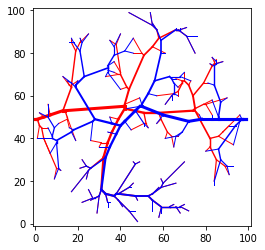

In [2]:
# Parametros da malha
N_mesh = [100, 100]
L      = [10, 10]

# Entradas do modelo
initial_params = {
    'X_in': [0 , 5],
    'X_out': [10, 5],
    'X_term': [5, 6],
    'P_in': 4000,
    'P_out': 0,
    'P_term': 2000,
    'f_term': 0.2,
}

# Inicialização da malha e aplicação das máscaras
M_base, dL = initialize_mesh(N_mesh, L)
mask = masks.ellipsoid_mask(N_mesh, dL, [[5, 5], [5, 5]])
M = M_base - mask

# Inicialização dos parametros do modelo
params = initialize_params(M, dL, **initial_params)

# Iteração do modelo
t_start = time()
iterate_model(100, params, seed=1, track_progress=True)
print('Tempo: %.5f'%(time() - t_start))

# Plotagem do modelo
if use_widget:
    %matplotlib widget
fig = plt.figure('Vasculatura gerada')
ax = helpers.setup_plot(fig, L, N_mesh)
helpers.plot_vasculature(params['in']['segments'], params['in']['nodes'], params['in']['flows'], color='red')
helpers.plot_vasculature(params['out']['segments'], params['out']['nodes'], params['out']['flows'], color='blue')

Regiões terminais adicionadas: 50
Tempo: 136.21277


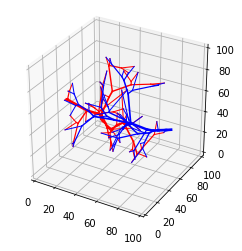

In [3]:
# Para o 3D

N_mesh = [100, 100, 100]
L      = [10, 10, 10]

initial_params = {
    'X_in': [0 , 5, 5],
    'X_out': [10, 5, 5],
    'X_term': [5, 6, 5],
    'P_in': 4000,
    'P_out': 0,
    'P_term': 2000,
    'f_term': 0.2,
}

M_base, dL = initialize_mesh(N_mesh, L)
mask = masks.ellipsoid_mask(N_mesh, dL, [[5, 5], [5, 5], [5, 5]])
M = M_base - mask

params = initialize_params(M, dL, **initial_params)

t_start = time()
iterate_model(50, params, seed=1, track_progress=True)
print('Tempo: %.5f'%(time() - t_start))

if use_widget:
    %matplotlib widget
fig = plt.figure('Vasculatura gerada')
ax = helpers.setup_plot(fig, L, N_mesh)
helpers.plot_vasculature(params['in']['segments'], params['in']['nodes'], params['in']['flows'], color='red')
helpers.plot_vasculature(params['out']['segments'], params['out']['nodes'], params['out']['flows'], color='blue')

https://github.com/FranciscoTLS/vasculature